In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

In [2]:
pseudoseq_positions = [7, 9, 24, 45, 59, 62, 63, 66, 67, 69,
                 70, 73, 74, 76, 77, 80, 81, 84, 85, 97,
                 99, 114, 116, 118, 143, 147, 150, 152, 
                 156, 158, 159, 163, 167, 171]

In [3]:
dist_df = pd.read_csv("./data/mhc_antigen_distances.txt", sep="\t")
dist_df = dist_df.loc[(dist_df.mhc_type == "MHCI") & (dist_df.mhc_chain != "B")]
dist_df.tail()

,pdb_id,mhc_aa,ant_aa,mhcpos,antpos,distance,mhc_pdbchain_a,mhc_pdbchain_b,antigen_pdbchain,mhc_type,mhc_chain,species
431173,5swz,P,N,277,5,61.390446,A,B,C,MHCI,A,Mus_musculus
431174,5swz,P,M,277,6,65.061638,A,B,C,MHCI,A,Mus_musculus
431175,5swz,P,E,277,7,66.668228,A,B,C,MHCI,A,Mus_musculus
431176,5swz,P,T,277,8,65.032188,A,B,C,MHCI,A,Mus_musculus
431177,5swz,P,M,277,9,63.932102,A,B,C,MHCI,A,Mus_musculus


In [4]:
dist_df.species.unique()

array(['Homo_sapiens', 'Mus_musculus'], dtype=object)

In [5]:
def get_postiions(data, specie):
    dist = data.loc[data.species == specie][["mhcpos", "antpos", "distance"]]
    dist_map_av = np.zeros((201, 10))
    dist_map_std = np.zeros((201, 10))
    
    for i in range(1, 201):
        for j in range(1, 10):
            cur_dists = np.array(dist.loc[(dist.mhcpos == i) & (dist.antpos == j)].distance)
            dist_map_av[i][j] = sum(cur_dists) / len(cur_dists)
    dist_map_av = dist_map_av[1:]
    
    for i in range(1, 201):
        for j in range(1, 10):
            cur_dists = np.array(dist.loc[(dist.mhcpos == i) & (dist.antpos == j)].distance)
            dist_map_std[i][j] = np.std(cur_dists)
    dist_map_std = dist_map_std[1:]

    return dist_map_av, dist_map_std
    

In [6]:
def draw_heat(data, title):
    plt.figure(figsize = (16, 3))
    plt.imshow(data.T,cmap='seismic',interpolation='none',vmin=np.min(data),vmax=int(np.max(data)) + 1)
    plt.colorbar()
    plt.title(title)
    plt.xlabel("MHC positions")
    plt.ylabel("Peptide positions")

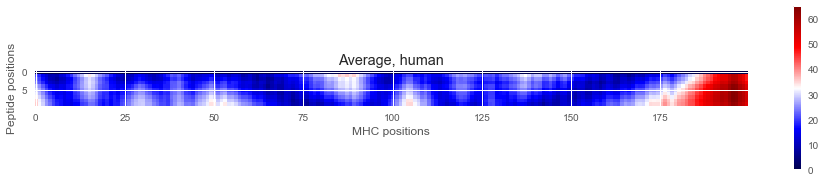

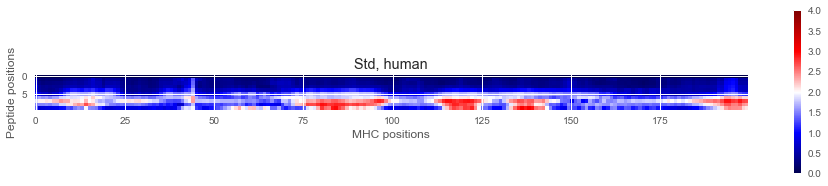

In [17]:
av_human, std_human = get_postiions(dist_df, "Homo_sapiens")
draw_heat(av_human, "Average, human")
draw_heat(std_human, "Std, human")

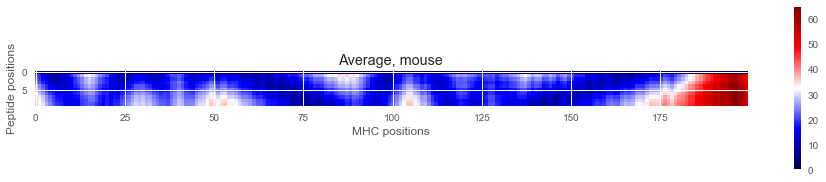

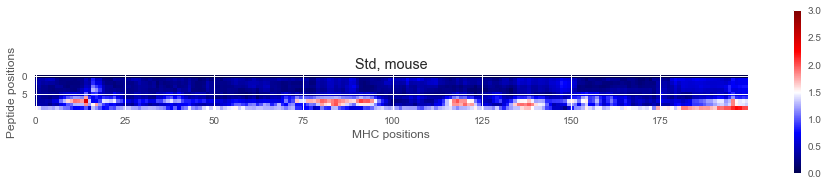

In [8]:
av_mouse, std_mouse = get_postiions(dist_df, "Mus_musculus")
draw_heat(av_mouse, "Average, mouse")
draw_heat(std_mouse, "Std, mouse")

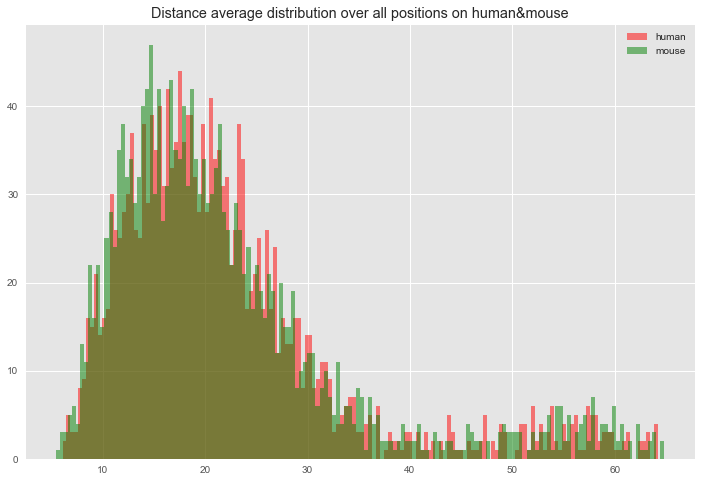

In [9]:
plt.figure(figsize=(12, 8))
plt.title("Distance average distribution over all positions on human&mouse")
dists = plt.hist(av_human.flatten()[np.where(av_human.flatten() > 0)], bins= 150, alpha=0.5, color="r", label="human")

dists = plt.hist(av_mouse.flatten()[np.where(av_mouse.flatten() > 0)], bins= 150, alpha = 0.5, color="g", label="mouse")
_ = plt.legend()



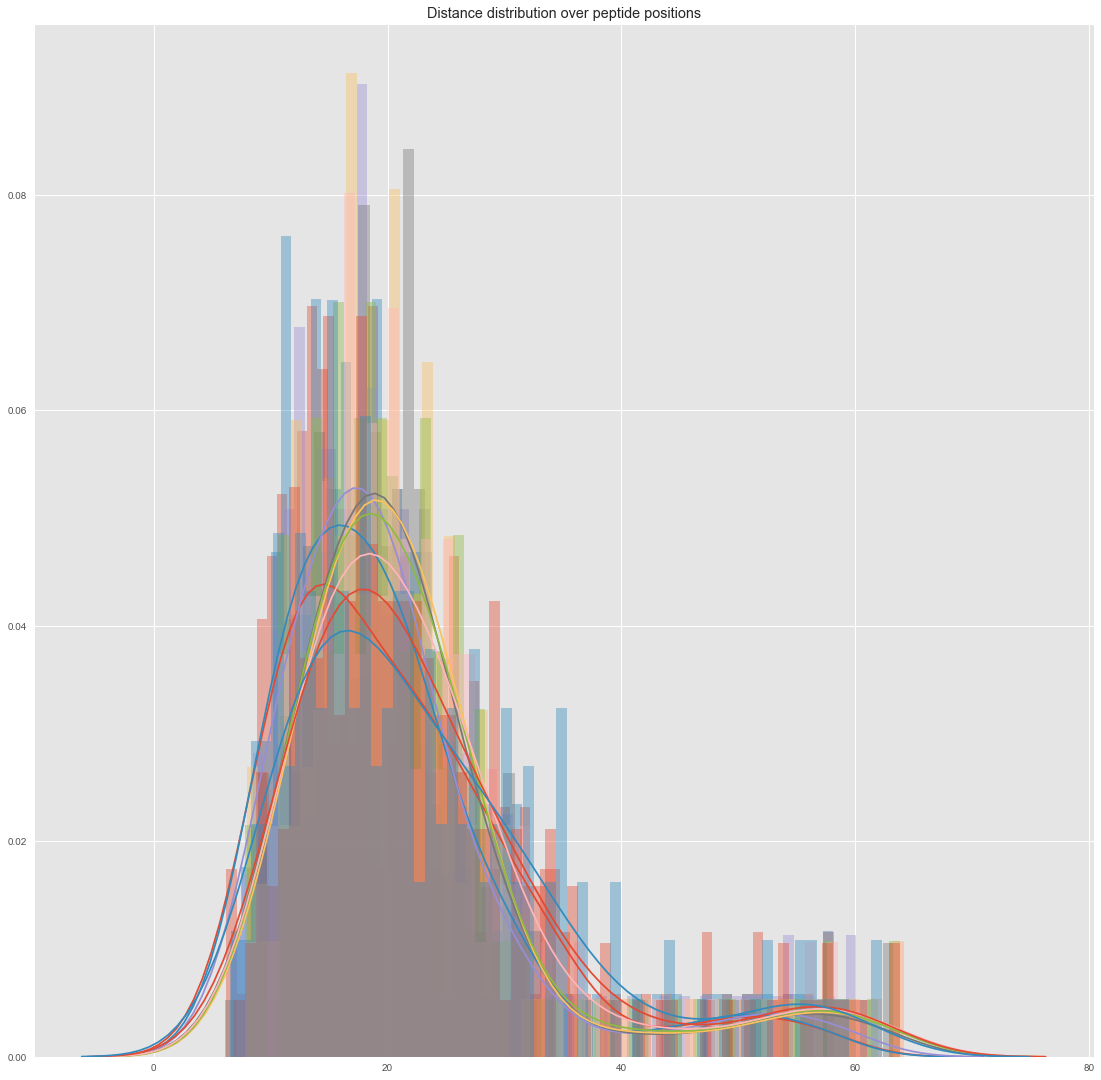

In [15]:
plt.figure(figsize=(19, 19))
for i in range(1, 10):
    cur_pos = av_human[1:][:,i]
    plt.title("Distance distribution over peptide positions")
    sns.distplot(cur_pos, bins = 60)

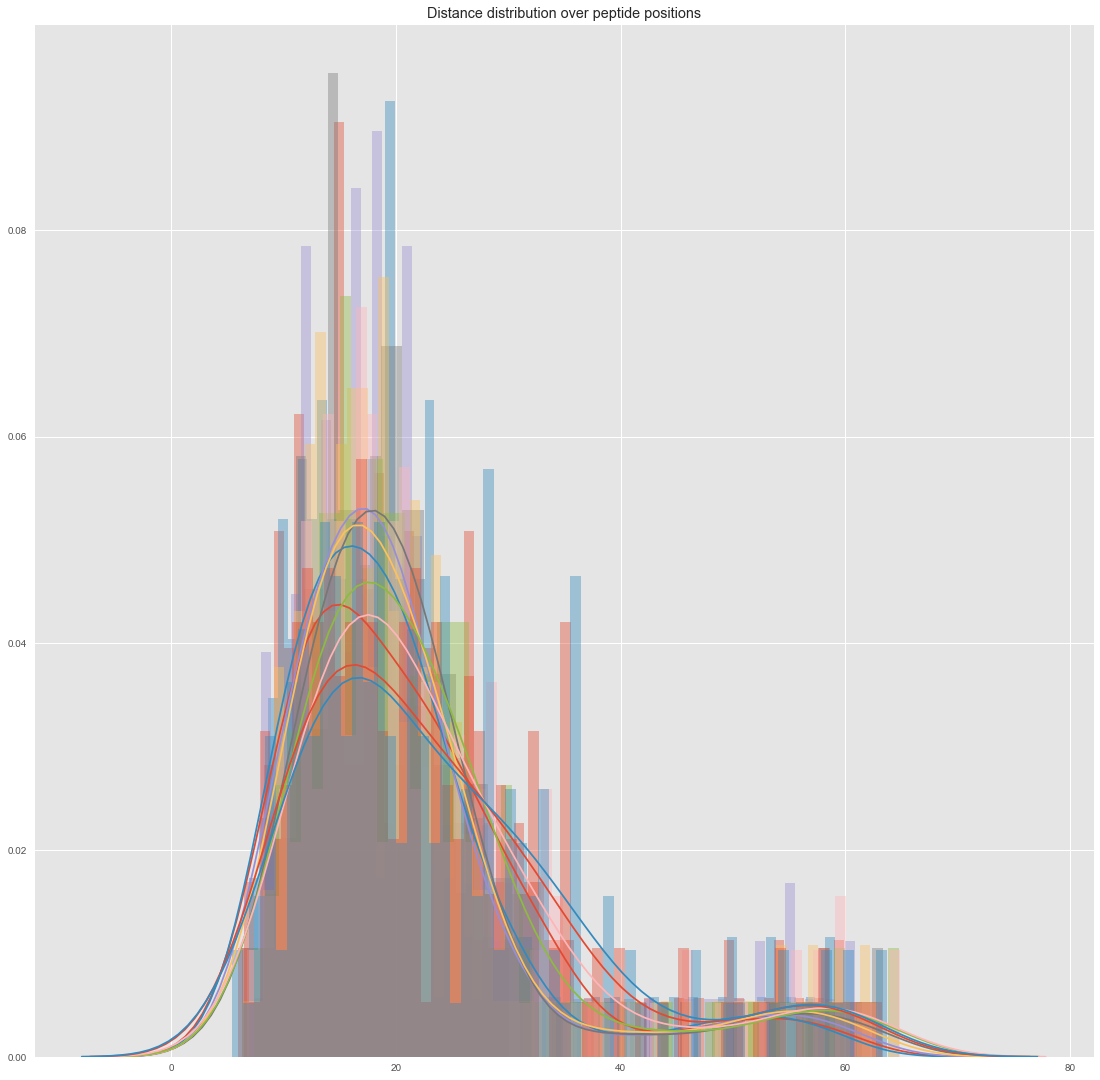

In [16]:
plt.figure(figsize=(19, 19))
for i in range(1, 10):
    cur_pos = av_mouse[1:][:,i]
    plt.title("Distance distribution over peptide positions")
    sns.distplot(cur_pos, bins = 60)